### Face completion

You get the left half of a face image. Predict the right one.

In [34]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import fetch_olivetti_faces
data = fetch_olivetti_faces().images

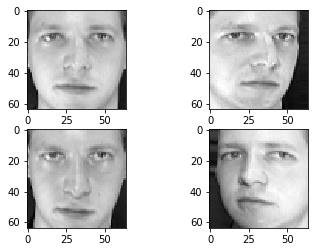

In [5]:
#Yet another matplotlib feature - subplot - creates a grid-like structure of plots
#Syntax: plt.subplot(width,height,index) with index starting from 1.
plt.subplot(2,2,1)
plt.imshow(data[0],cmap='gray')
plt.subplot(2,2,2)
plt.imshow(data[1],cmap='gray')
plt.subplot(2,2,3)
plt.imshow(data[2],cmap='gray')
plt.subplot(2,2,4)
plt.imshow(data[3],cmap='gray')

# X,y

We now must slice the data into known part "X" and unknown part "y". Since data is just a numpy array, you can slice it with multi-dimensional slices.

The dimensions are (image_index, height, width).

* `data[:10]` - first 10 images
* `data[:, :10]` - 10-pixel stripe at the top of each image.
* `data[10:20, :, :10]` - take images 10-19 and slice __horizontally__ a stripe of width 10 pixels

Let's now use that to slice our data.


In [28]:
X = data[:, :, :32]


y = data[:, :, 32:]



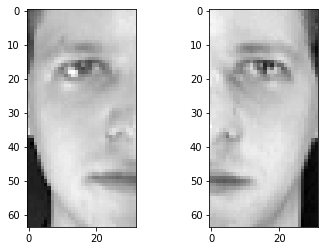

In [29]:
#If you did everything right, you should see two half-faces composing a face
plt.subplot(1,2,1)
plt.imshow(X[0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(y[0],cmap='gray')


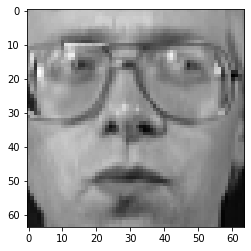

In [32]:
def glue(left_half,right_half):
    #melt two half-faces back into a face
    left_half = left_half.reshape([-1,64,32])
    right_half = right_half.reshape([-1,64,32])
    return np.concatenate([left_half,right_half],axis=-1)


plt.imshow(glue(X,y)[12],cmap='gray')

# Linear Regression

Now let's get through the usual pipeline: split data between train and test; fit linear regression

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X.reshape([len(X),-1]),
                                                 y.reshape([len(y),-1]),
                                                 test_size=0.05,random_state=42)
print("X_train.shape=",X_train.shape)
print("X_test.shape=",X_test.shape)


X_train.shape= (380, 2048)
X_test.shape= (20, 2048)


In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(Y_train,model.predict(X_train)))
print(mean_squared_error(Y_test,model.predict(X_test)))

3.194561e-12
0.0102842115


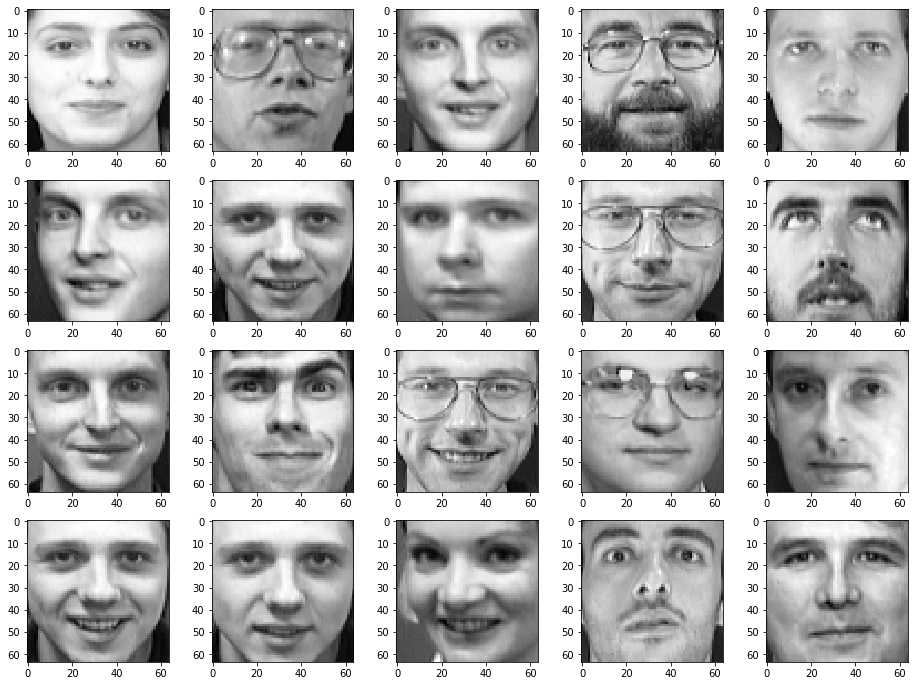

In [40]:
#Images restored on the training settrain

predictions = model.predict(X_train)

pics = glue(X_train,predictions)
plt.figure(figsize=[16,12])
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(pics[i],cmap='gray')

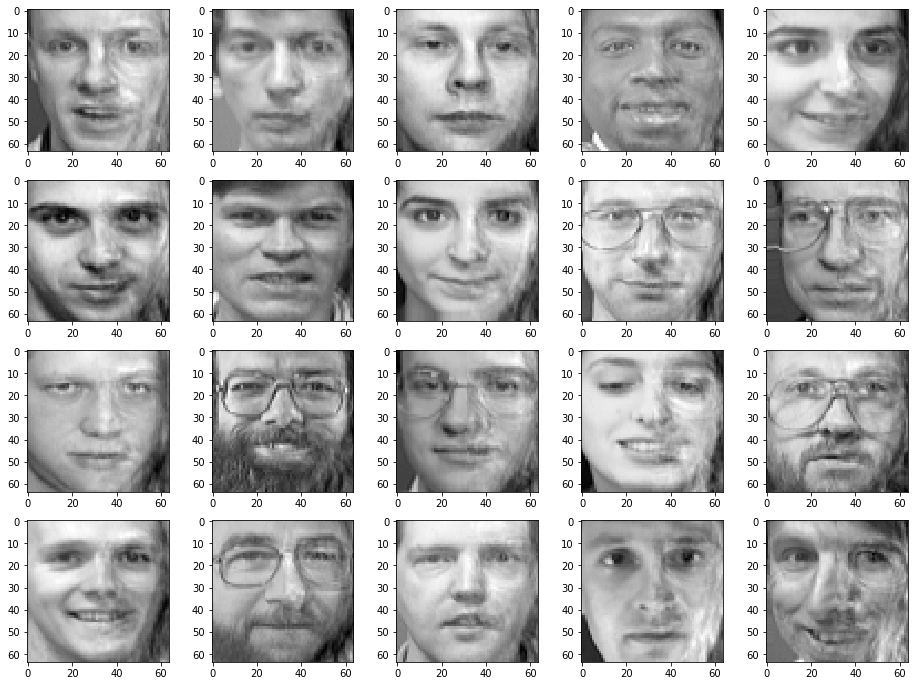

In [41]:
#Images from test restored
predictions = model.predict(X_test)

pics = glue(X_test,predictions)
plt.figure(figsize=[16,12])
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(pics[i],cmap='gray')

# Ridge regression

Ridge regression is a simple linear regression with L2 penalty: $ argmin \space L + \alpha \cdot \sum_i W_i^2 $


In [42]:
from sklearn.linear_model import Ridge

#Example syntax: Ridge(alpha=0.5), just like LinearRegression


In [51]:
ridgeModel = Ridge(alpha=0.5)
ridgeModel.fit(X_train,Y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [53]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(Y_train,ridgeModel.predict(X_train)))
print(mean_squared_error(Y_test,ridgeModel.predict(X_test)))

0.00042305954
0.008029604


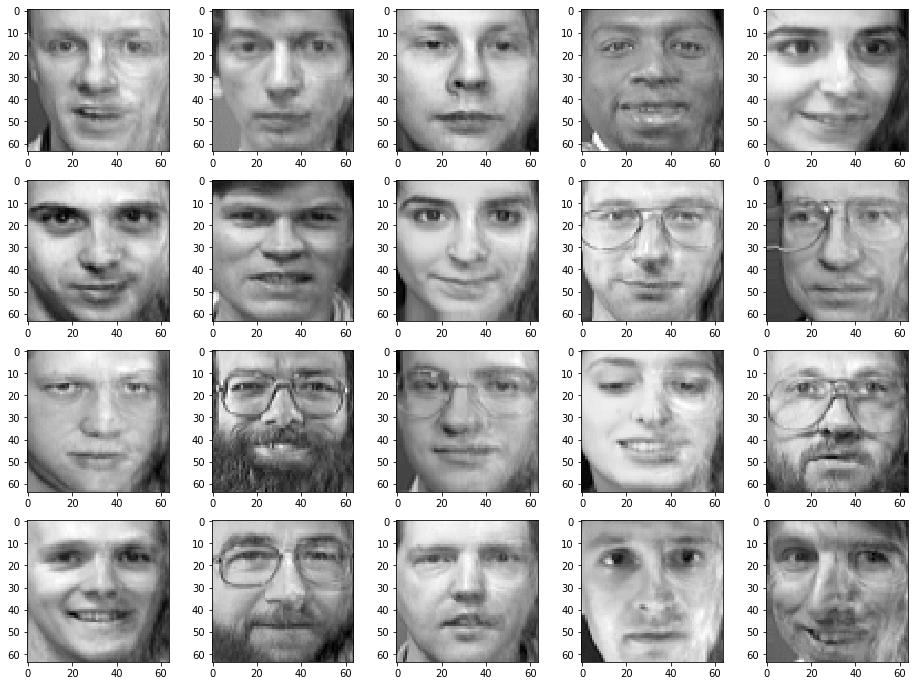

In [54]:
#Images from test restored
predictions = ridgeModel.predict(X_test)

pics = glue(X_test,predictions)
plt.figure(figsize=[16,12])
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(pics[i],cmap='gray')

# Bonus: Grid search

Find alpha that minimizes test error. You can do so by enumerating all alphas in a reasonable diapason using loops.

In [117]:
def returnError(alpha):
    ridgeModel = Ridge(alpha)
    ridgeModel.fit(X_train,Y_train)
    return(mean_squared_error(Y_test,ridgeModel.predict(X_test)))

alphaErrors = {}

sort = sorted(alphaErrors.items(), key=lambda item: item[1])

print(sort[0][0])

/home/ppd/bju38816/.local/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


{0: 0.010317793, 1: 0.0075132228, 2: 0.0071671507, 3: 0.0070787203, 4: 0.007076421, 5: 0.0071114227}
4


In [132]:
def alphaRange(start, end, step):
    while start <= end:
        yield start
        print(start)
        start += step

def returnError(alpha):
    ridgeModel = Ridge(alpha)
    ridgeModel.fit(X_train,Y_train)
    return(mean_squared_error(Y_test,ridgeModel.predict(X_test)))

for x in alphaRange(1, 10, 0.5):
    print(returnError(x))

0.0075132228
1
0.00728412
1.5
0.0071671507
2.0
0.0071067014
2.5
0.0070787203
3.0
0.0070709684
3.5
0.007076421
4.0
0.0070908293
4.5
0.0071114227
5.0
0.007136359
5.5
0.007164359
6.0
0.0071945135
6.5
0.007226169
7.0
0.0072588306
7.5
0.0072921547
8.0
0.0073258625
8.5
0.0073597464
9.0
0.0073936596
9.5
0.0074274763
10.0
